In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import xavierUtils as xu
import datetime as dt
%autosave 1000000

Autosaving every 1000000 seconds


In [2]:
pd.to_datetime('2019-02-01') + pd.to_timedelta(99, unit='d')

Timestamp('2019-05-11 00:00:00')

In [3]:
today = dt.datetime.now().strftime("%Y-%m-%d")
print today

2019-05-06


### Carregando dados

In [4]:
# Dados brutos sobre órgãos (comissões, etc.):
query = "SELECT * FROM `gabinete-compartilhado.camara_v2.deputados_orgaos`"

rorgaos = pd.read_gbq(query, project_id='gabinete-compartilhado', 
                dialect='standard',
                private_key='../keys-configs/gabinete-compartilhado.json')

rorgaos['id_deputado'] = rorgaos.api_url.map(lambda s: int(s.split('/')[-2]))

In [5]:
# Ocupação de tipos de cargos (nossa classificação) e score de poder:
query = "SELECT * FROM `gabinete-compartilhado.analise_congresso_poder.camara_cargos_score`"

rcargos = pd.read_gbq(query, project_id='gabinete-compartilhado', 
                dialect='standard',
                private_key='../keys-configs/gabinete-compartilhado.json')

In [6]:
# Ocupação de lideranças partidárias e de bloco:
query = "SELECT * FROM `gabinete-compartilhado.analise_congresso_poder.camara_liderancas_socre_`"

rlider = pd.read_gbq(query, project_id='gabinete-compartilhado', 
                dialect='standard',
                private_key='../keys-configs/gabinete-compartilhado.json')

In [7]:
# Informações sobre os deputados:
query = "SELECT * FROM `gabinete-compartilhado.camara_v2.deputados_detalhes`"
rdep  = pd.read_gbq(query, project_id='gabinete-compartilhado', 
                    dialect='standard',
                    private_key='../keys-configs/gabinete-compartilhado.json')

In [48]:
# Informações sobre os deputados:
query = "SELECT * FROM `gabinete-compartilhado.camara_v2.deputados`"
rdep0 = pd.read_gbq(query, project_id='gabinete-compartilhado', 
                    dialect='standard',
                    private_key='../keys-configs/gabinete-compartilhado.json')

In [46]:
# Informações sobre os deputados:
#query = "SELECT * FROM `gabinete-compartilhado.congresso.camara_deputado_`"
#rdep0 = pd.read_gbq(query, project_id='gabinete-compartilhado', 
#                    dialect='standard',
#                    private_key='../keys-configs/gabinete-compartilhado.json')

In [49]:
columns(rdep0)

14: api_url | capture_date | dataFalecimento | dataNascimento | idLegislaturaFinal | idLegislaturaInicial | municipioNascimento | nome | nomeCivil | siglaSexo | ufNascimento | uri | urlRedeSocial | urlWebsite


### Exploração

#### Base Cargos

In [9]:
print xu.Bold('-- Cargos --')
xu.unique(rcargos.columns)

-- Cargos --
5: cargo | data_fim | data_inicio | id_deputado | score


In [10]:
rcargos.dtypes

data_inicio    datetime64[ns]
data_fim       datetime64[ns]
id_deputado             int64
cargo                  object
score                 float64
dtype: object

In [11]:
xu.checkMissing(rcargos)

Colunas com valores faltantes:
Empty DataFrame
Columns: [coluna, N, %]
Index: []


In [12]:
xu.mapUnique(rcargos)


data_inicio: 564 unique values.
(sample) 1924-04-15T00:00:00.000000000,  1991-02-01T00:00:00.000000000,  2001-05-23T00:00:00.000000000,  2003-05-07T00:00:00.000000000,  2004-03-23T00:00:00.000000000,  2004-06-23T00:00:00.000000000,  2007-01-03T00:00:00.000000000,  2008-03-27T00:00:00.000000000,  2009-04-06T00:00:00.000000000,  2010-03-03T00:00:00.000000000,  2011-03-02T00:00:00.000000000,  2013-10-15T00:00:00.000000000,  2015-03-12T00:00:00.000000000,  2015-04-07T00:00:00.000000000,  2015-07-07T00:00:00.000000000,  2015-09-15T00:00:00.000000000,  2015-11-04T00:00:00.000000000,  2016-05-31T00:00:00.000000000,  2017-10-23T00:00:00.000000000,  2019-03-12T00:00:00.000000000

data_fim: 586 unique values.
(sample) 1894-04-17T00:00:00.000000000,  1924-04-14T00:00:00.000000000,  1999-09-29T00:00:00.000000000,  2000-08-21T00:00:00.000000000,  2001-02-14T00:00:00.000000000,  2001-09-28T00:00:00.000000000,  2003-07-01T00:00:00.000000000,  2004-10-28T00:00:00.000000000,  2007-08-16T00:00:00.00000

#### Base Lideranças

In [13]:
print xu.Bold('-- Lideranças --')
xu.unique(rlider.columns)

-- Lideranças --
7: cargo | id_cargo | id_deputado | score | sigla_bloco | timestamp | total_membros


In [14]:
rlider.dtypes

timestamp        datetime64[ns]
id_deputado             float64
id_cargo                  int64
sigla_bloco              object
total_membros           float64
cargo                    object
score                   float64
dtype: object

In [15]:
xu.checkMissing(rlider)

Colunas com valores faltantes:
          coluna    N      %
1    id_deputado   59   2.34
4  total_membros  378  15.02


In [16]:
xu.mapUnique(rlider)


timestamp: 14 unique values.
2019-04-16T00:00:00.000000000,  2019-04-17T00:00:00.000000000,  2019-04-18T00:00:00.000000000,  2019-04-25T00:00:00.000000000,  2019-04-26T00:00:00.000000000,  2019-04-27T00:00:00.000000000,  2019-04-28T00:00:00.000000000,  2019-04-29T00:00:00.000000000,  2019-04-30T00:00:00.000000000,  2019-05-01T00:00:00.000000000,  2019-05-02T00:00:00.000000000,  2019-05-03T00:00:00.000000000,  2019-05-04T00:00:00.000000000,  2019-05-05T00:00:00.000000000

id_deputado: 192 unique values.
(sample) 73943.0,  76874.0,  81055.0,  160535.0,  160545.0,  160642.0,  178959.0,  178961.0,  178986.0,  178990.0,  204375.0,  204408.0,  204415.0,  204425.0,  204473.0,  204477.0,  204479.0,  204494.0,  204518.0,  204572.0

id_cargo: 3 unique values.
2,  3,  4

sigla_bloco: 33 unique values.
(sample) AVANTE,  Bloco PDT, AVANTE,  DEM,  Governo,  Minoria,  NOVO,  PCdoB,  PDT,  PHS,  PMN,  PODE,  PP,  PR,  PRP,  PSB,  PSD,  PSDB,  PSL,  PT,  PV

total_membros: 22 unique values.
(sample) 1

#### Base orgaos (bruta)

In [17]:
xu.unique(rorgaos.columns)

11: api_url | capture_date | codTitulo | dataFim | dataInicio | idOrgao | id_deputado | nomeOrgao | siglaOrgao | titulo | uriOrgao


In [18]:
rdep.loc[rdep.id==204534]

,api_url,capture_date,cpf,dataNascimento,escolaridade,id,municipioNascimento,nomeCivil,redeSocial,sexo,ufNascimento,ultimoStatus,uri
7277,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-05-06 01:02:30,3.884832e+10,1993-11-14,Superior,204534,São Paulo,TABATA CLAUDIA AMARAL DE PONTES,[],F,SP,"{u'nomeEleitoral': u'TABATA AMARAL', u'situaca...",https://dadosabertos.camara.leg.br/api/v2/depu...


#### Base deputados

In [19]:
xu.unique(rdep.columns)

13: api_url | capture_date | cpf | dataNascimento | escolaridade | id | municipioNascimento | nomeCivil | redeSocial | sexo | ufNascimento | ultimoStatus | uri


In [20]:
xu.checkMissing(rdep)

Colunas com valores faltantes:
                 coluna     N      %
2                   cpf  4239   55.7
3        dataNascimento  1416   18.6
4          escolaridade  2262  29.72
6   municipioNascimento  2037  26.76
10         ufNascimento  1535  20.17


In [21]:
# ATENÇÃO: Data de falecimento faltando é uma string vazia:
#rdep.sort_values('dataNascimento').dataFalecimento[1009]

### Pesos dos cargos e lideranças

In [22]:
pd.concat([rcargos[['cargo','score']].drop_duplicates(),rlider[['cargo','score']].drop_duplicates()])\
.sort_values('score', ascending=False).set_index('cargo', drop=True)

,score
cargo,
Lider Governo Camara,3.70
Lider de Partido/Bloco,3.60
"Presidencia Comissao Serie A - CCJC, CMO e CFT",3.50
Membro da Mesa,2.80
Presidente CPI,2.80
"Presidencia Comissao Serie B - CE, CETASP, CINDA, CREDEN, CSSF, CCTCI, CVT, CMADS, CSPCCO, CME, CAPADR, CDC, CDEIC",2.60
Relator de Comissao Especial,2.50
Vice Lider,2.25
"Membro de Comissao Serie A - CCJC, CMO e CFT",1.90


In [23]:
rlider[['cargo','score']].drop_duplicates().sort_values('score',ascending=False)

,cargo,score
1717,Lider Governo Camara,3.70
0,Lider de Partido/Bloco,3.60
14,Vice Lider,2.25


### Evolução temporal do número de cargos por deputado

In [14]:
# Função para selecionar cargos ativos num certo período:
def activeInPeriod(df, start, end):
    if np.any(df.columns.values=='data_inicio') and np.any(df.columns.values=='data_fim'):
        return df.loc[(df.data_fim>=start) & (df.data_inicio<=end)]
    if np.any(df.columns.values=='dataInicio') and np.any(df.columns.values=='dataFim'):
        return df.loc[(df.dataFim>=start) & (df.dataInicio<=end)]
    if np.any(df.columns.values=='timestamp'):
        return df.loc[(df.timestamp>=start) & (df.timestamp<=end)]

In [25]:
orgaosActive = activeInPeriod(rorgaos,'2019-02-01','2019-04-23').sort_values('id_deputado')
cargosActive = activeInPeriod(rcargos,'2019-02-01','2019-04-23').sort_values('id_deputado')

In [26]:
# Teste para verificar quais cargos e deputados aparecem nas bases:

#idList = orgaosActive.loc[orgaosActive.titulo!='Suplente'].id_deputado.unique()
#t=6
#cargosActive.loc[cargosActive.id_deputado==idList[t]][['id_deputado','cargo','score','data_inicio','data_fim']]
#orgaosActive.loc[(orgaosActive.titulo!='Suplente')&(orgaosActive.id_deputado==idList[t])]\
#[['id_deputado','siglaOrgao','titulo','dataInicio','dataFim']]

In [27]:
# Vimos que a CESPO - Comissão do Esporte - não é contabilizada na base cargos.
#rorgaos.loc[rorgaos.siglaOrgao=='CESPO']

In [28]:
def nCargosPreenchidos(ano):
    return len(activeInPeriod(rcargos, str(ano)+'-02-01', str(ano)+'-04-16')[['id_deputado','cargo']])

In [29]:
anos         = np.arange(1999,2020)
nCargosByAno = np.array([nCargosPreenchidos(a) for a in anos])

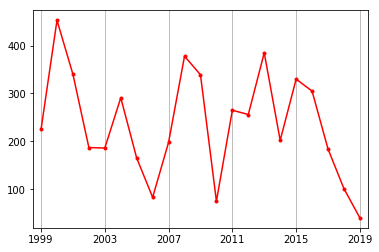

In [30]:
pl.plot(anos, nCargosByAno,'r-')
pl.plot(anos, nCargosByAno,'r.')
pl.xlim([1998.5,2019.5])
pl.xticks(np.arange(1999,2020,4))
pl.grid(axis='x')
pl.show()

In [31]:
y = nCargosByAno
x = anos
yIdx  = pd.date_range(start=str(x[0])+'-'+str(1).zfill(2)+'-01', periods=len(x),freq='A-JAN')
yFull = pd.Series(y, index=yIdx)

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(yFull.iloc[:-1], model='additive', freq=4)

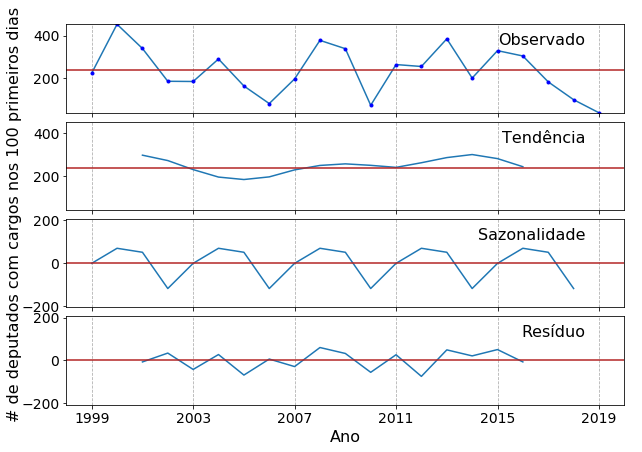

In [43]:
#xPeriod = np.arange(1999,2020,4) # Para grid no plot.
xPeriod = yIdx[::4]

fullTS = pd.Series(y,x, name='fullTimeSeries')
scale  = 1
ymin   = y[y>0].min()/scale
ymax   = y[y>0].max()/scale
deltay = ymax-ymin
sMean  = np.mean(y)/scale

fig = pl.figure(figsize=(10,7))

# Observed:
ax1 = pl.subplot(4,1,1)
pl.text(0.93,0.9,'Observado', horizontalalignment='right', verticalalignment='top', transform=pl.gca().transAxes, 
       fontsize=16)
pl.plot(yFull/scale)
pl.plot(yFull/scale, 'b.')

pl.ylim([ymin,ymax])
pl.gca().tick_params(labelsize=14)
pl.axhline(sMean,color='firebrick')
# Format x-axis:
pl.xticks(xPeriod)
pl.grid(axis='x', linestyle='--')
pl.gca().tick_params(labelbottom=False)
# Novas legislaturas:
#[pl.axvline(a, color='k') for a in anoLegislatura]

# Trend:
pl.subplot(4,1,2, sharex=ax1)
pl.text(0.93,0.9,u'Tendência', horizontalalignment='right', verticalalignment='top', transform=pl.gca().transAxes, 
       fontsize=16)
pl.plot(result.trend/scale)
pl.ylim([ymin,ymax])
pl.gca().tick_params(labelsize=14)
pl.axhline(sMean,color='firebrick')
# Format x-axis:
pl.xticks(xPeriod)
pl.grid(axis='x', linestyle='--')
pl.gca().tick_params(labelbottom=False)
# Novas legislaturas:
#[pl.axvline(a, color='k') for a in anoLegislatura]

# Seasonal:
pl.subplot(4,1,3, sharex=ax1)
pl.text(0.93,0.9,'Sazonalidade', horizontalalignment='right', verticalalignment='top', transform=pl.gca().transAxes, 
       fontsize=16)

pl.plot(result.seasonal/scale)
pl.ylim([-deltay/2, deltay/2])
pl.gca().tick_params(labelsize=14)
# Format x-axis:
pl.xticks(xPeriod)
pl.grid(axis='x', linestyle='--')
pl.gca().tick_params(labelbottom=False)
pl.axhline(0,color='firebrick')
# Novas legislaturas:
#[pl.axvline(a, color='k') for a in anoLegislatura]

# Residual:
pl.subplot(4,1,4, sharex=ax1)
pl.text(0.93,0.9,u'Resíduo', horizontalalignment='right', verticalalignment='top', transform=pl.gca().transAxes, 
       fontsize=16)
pl.plot(result.resid/scale)
pl.ylim([-deltay/2, deltay/2])
pl.gca().tick_params(labelsize=14)
# Format x-axis:
pl.xticks(xPeriod)
pl.grid(axis='x', linestyle='--')
pl.axhline(0,color='firebrick')
pl.xlabel('Ano', fontsize=16)
# Novas legislaturas:
#[pl.axvline(a, color='k') for a in anoLegislatura]


# Label x comum:
axComum = fig.add_subplot(111, frameon=False)
pl.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axComum.set_ylabel(u'# de deputados com cargos nos 100 primeiros dias', fontsize=16, labelpad=15)

# Ajustes finais:
pl.gca().tick_params(labelsize=14)
pl.subplots_adjust(hspace=0.1)
#xu.saveFigWdate('graficos/cargos_sazonalidade.pdf')
pl.show()

In [44]:
def nOrgaosPreenchidos(ano):
    return len(activeInPeriod(rorgaos.loc[rorgaos.titulo!='Suplente'], 
                              str(ano)+'-02-01', str(ano)+'-04-18')[['id_deputado','siglaOrgao']])

In [45]:
xu.unique(rorgaos.columns)

11: api_url | capture_date | codTitulo | dataFim | dataInicio | idOrgao | id_deputado | nomeOrgao | siglaOrgao | titulo | uriOrgao


In [46]:
xu.unique(rorgaos.nomeOrgao)

914: Acompanhar a apuração do acidente ocorrido na madrugada de hoje na Plataforma  P-36, da Petrobrás, no Campo de Roncador, na Bacia de Campos | Altera o Sistema Tributário Nacional e dá outras providências. | Bancada do Rio de Janeiro | Centro de Estudos e Debates Estratégicos | Comissão  Parlamentar de Inquérito destinada a " investigar as relaçoes do Banco Central do Brasil com o sistema financeiro privado" - PROER. | Comissão Especial  destinada a analisar proposições legislativas que tenham por objetivo o combate à pirataria. | Comissão Especial  destinada a proferir parecer à Proposta de Emenda à Constituição nº 299-A, de 2013, do Sr. Eduardo Cunha e outros, que "altera o art. 88 da Constituição Federal" (limita o número de ministérios) | Comissão Especial  destinada a proferir parecer à Proposta de Emenda à Constituição nº 405-A, de 2009,  do Sr. Cleber Verde, que "altera a redação do § 8º do art. 195 da Constituição Federal, para assegurar ao Garimpeiro e ao pequeno minerador

In [47]:
anos         = np.arange(1990,2020)
nOrgaosByAno = np.array([nOrgaosPreenchidos(a) for a in anos])

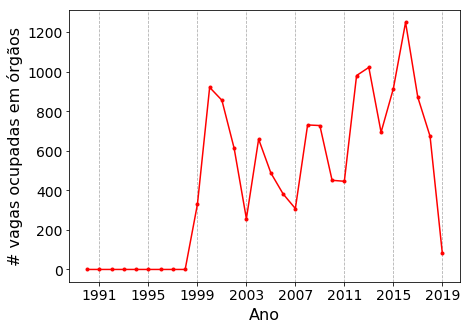

In [48]:
pl.figure(figsize=(7,5))
pl.plot(anos, nOrgaosByAno,'r-')
pl.plot(anos, nOrgaosByAno,'r.')
pl.xticks(np.arange(2019,1990,-4))
pl.grid(axis='x', linestyle='--')
pl.gca().tick_params(labelsize=14)
pl.xlabel('Ano', fontsize=16)
pl.ylabel(u'# vagas ocupadas em órgãos', fontsize=16)
#xu.saveFigWdate('graficos/orgaos-ocupados-por-ano.pdf')
pl.show()

In [ ]:
# CONCLUSÃO: O ano de 2019 está com problemas na base de dados. Vamos realizar a análise ignorando esse ano.

# Análise histórica

### Quantos dias dura o cargo

In [9]:
# Constrói base de dados histórica (antes de 2019) com número de dias no cargo:
rcargos['n_dias'] = (rcargos.data_fim - rcargos.data_inicio).dt.days
cargos_hist = rcargos.loc[(rcargos.data_fim<='2018-12-31') & (rcargos.data_inicio>='1999-02-01')]

In [10]:
# Existem datas erradas na base de dados:
rcargos.loc[rcargos.n_dias<0]

,data_inicio,data_fim,id_deputado,cargo,score,n_dias
110,2009-12-08,2009-04-09,148134,Membro de Comissao Serie C - Resto,0.3,-243
335,2009-04-03,2009-03-25,141510,Membro de Comissao Serie C - Resto,0.3,-9
359,2009-04-03,2009-01-04,141413,Membro de Comissao Serie C - Resto,0.3,-89
426,2007-07-03,2007-05-25,141519,Membro de Comissao Serie C - Resto,0.3,-39
970,2008-04-03,2008-02-04,141417,"Membro de Comissao Serie A - CCJC, CMO e CFT",1.9,-59
1074,2007-08-03,2007-03-19,73565,"Membro de Comissao Serie A - CCJC, CMO e CFT",1.9,-137
1422,2008-07-17,2008-02-11,150876,"Membro de Comissao Serie B - CE, CETASP, CINDA...",1.0,-157
1989,2007-10-18,2007-06-12,73808,"Membro de Comissao Serie B - CE, CETASP, CINDA...",1.0,-128
2059,2008-04-03,2008-03-18,141420,"Membro de Comissao Serie B - CE, CETASP, CINDA...",1.0,-16
2213,2009-04-03,2009-03-26,141484,"Membro de Comissao Serie B - CE, CETASP, CINDA...",1.0,-8


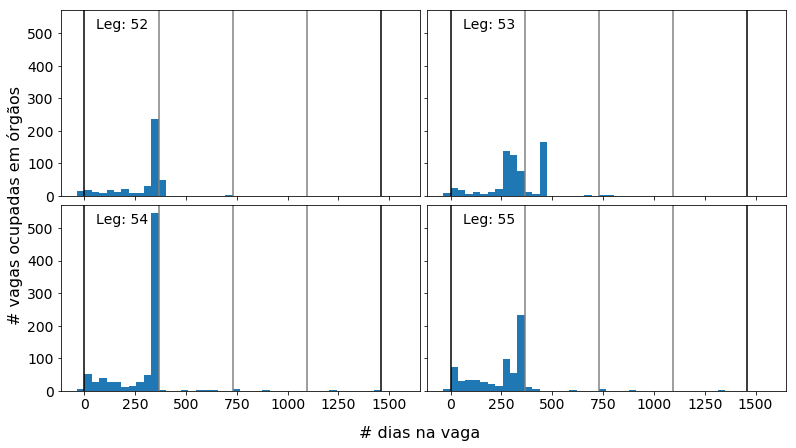

In [15]:
leg_ano_inicial = dict(zip(np.arange(56, 1, -1), np.arange(2019, 2019 - 4*(56-1), -4)))
nRows = 2
nCols = 2
pl.figure(figsize=(13,7))

for i in range(1,1+4):
    pl.subplot(nRows,nCols,i)
    # Seleciona legislatura:
    leg = 51+i
    ano = leg_ano_inicial[leg]
    cargos_leg = activeInPeriod(cargos_hist, str(ano)+'-02-01', str(ano+3)+'-12-31')
    # Texto: 
    pl.text(0.1,0.9,'Leg: '+str(leg),transform = pl.gca().transAxes, fontsize=14)

    # Histograma:
    ncargos_edges = np.arange(-36.5,1600,36.5)
    pl.hist(cargos_leg.n_dias - 1, bins=ncargos_edges)
    # Formatação:
    pl.gca().tick_params(labelsize=14)
    # Formatação do eixo x:
    if (i-1) < nCols*(nRows-1):
        pl.gca().tick_params(labelbottom=False)
    else:
        xlabel = '# dias na vaga'
        if (nCols%2 == 0 and (i-1)%nCols == nCols/2 - 1):
            pl.xlabel(xlabel, fontsize=16, position=(1,0), labelpad=14)
        elif (nCols%2 == 1 and (i-1)%nCols == nCols/2):
            pl.xlabel(xlabel, fontsize=16, labelpad=14)
    # Formatação do eixo y:
    pl.ylim([0,570])
    if (i-1)%nCols!=0:
        pl.gca().tick_params(labelleft=False)
    else:
        ylabel = u'# vagas ocupadas em órgãos'
        if (nRows%2==0 and (i-1)/nCols == nRows/2):
            pl.ylabel(ylabel, fontsize=16, position=(0,1))
        elif (nRows%2==1 and (i-1)/nCols == nRows/2):
            pl.ylabel(ylabel, fontsize=16)
    pl.axvline(0,color='k')
    pl.axvline(365,color='gray')
    pl.axvline(2*365,color='gray')
    pl.axvline(3*365,color='gray')
    pl.axvline(4*365,color='k')
    
pl.subplots_adjust(wspace=0.02, hspace=0.05)
#xu.saveFigWdate('graficos/vagas_ocupadas_por_tempo_na_vaga.pdf')
pl.show()

In [221]:
# Cargos que ficam mais de 3 anos:
xu.unique(cargos_hist.loc[cargos_hist.n_dias>3*365]['cargo'])

2: Membro da Mesa | Relator de Comissao Especial


## Distribuição por deputado

In [29]:
def columns(df):
    xu.unique(df.columns)

In [61]:
columns(rdep)

13: api_url | capture_date | cpf | dataNascimento | escolaridade | id | municipioNascimento | nomeCivil | redeSocial | sexo | ufNascimento | ultimoStatus | uri


In [64]:
rdep['idLegislatura'] = rdep.ultimoStatus.apply(lambda x: x[u'idLegislatura'])

In [68]:
len(rdep.groupby('id')['idLegislatura'].nunique())

7611

In [69]:
np.sum(rdep.groupby('id')['idLegislatura'].nunique())

7611

In [55]:
ano = 2015
activeInPeriod(cargos_hist, str(ano)+'-02-01', str(ano+3)+'-12-31').id_deputado

60      178956
63      178850
66      178945
77       91208
98      178872
102     178987
104     178851
107     192120
121     178947
137      72442
151     178855
192     190149
195     178975
197     160976
198     178949
199     178972
200     178995
201     146829
202     194258
203     194258
204     194258
282     178867
283     178947
308     178841
309      93083
310     178880
311     178991
312     178853
313     178914
314     178895
         ...  
3054    194262
3055    195997
3056    180545
3098    178935
3099    171782
3227    178890
3228    187008
3231    191923
3232    178995
3434    178904
3435    178904
3437    194259
3438    194260
3439    194259
3440    194259
3441     91208
3443    195997
3444    194260
3446    193982
3451    204011
3453    178945
3456    178947
3457    178850
3461    178853
3462    137853
3467    178844
3468    178982
3475    178877
3476    178939
3477     67312
Name: id_deputado, Length: 644, dtype: int64

In [50]:
columns(rcargos)

6: cargo | data_fim | data_inicio | id_deputado | n_dias | score


In [33]:
leg = 55
ano = leg_ano_inicial[leg]
Ndeps_leg      = len(rdep0.loc[(rdep0.idLegislaturaInicial<=leg) & (rdep0.idLegislaturaFinal>=leg)])
Ncargos_by_dep = activeInPeriod(cargos_hist, str(ano)+'-02-01', str(ano+3)+'-12-31').groupby('id_deputado').size()
Ndeps_zero_cargos = Ndeps_leg - len(Ncargos_by_dep)

In [41]:
rdep0.loc[(rdep0.idLegislaturaInicial<=leg) & (rdep0.idLegislaturaFinal>=leg)]

,api_url,capture_date,dataFalecimento,dataNascimento,idLegislaturaFinal,idLegislaturaInicial,municipioNascimento,nome,nomeCivil,siglaSexo,ufNascimento,uri,urlRedeSocial,urlWebsite
2825,http://dadosabertos.camara.leg.br/arquivos/dep...,2019-05-06 01:01:17,,1956-12-23,55,53,Rio Formoso,SILVIO COSTA,SÍLVIO SERAFIM COSTA,M,PE,https://dadosabertos.camara.leg.br/api/v2/depu...,[],[]
2826,http://dadosabertos.camara.leg.br/arquivos/dep...,2019-05-06 01:01:17,,1956-04-07,55,53,Araújos,IZALCI LUCAS,IZALCI LUCAS FERREIRA,M,MG,https://dadosabertos.camara.leg.br/api/v2/depu...,[],[]
2827,http://dadosabertos.camara.leg.br/arquivos/dep...,2019-05-06 01:01:17,,1958-09-01,55,54,Fortaleza,DANILO FORTE,FRANCISCO DANILO BASTOS FORTE,M,CE,https://dadosabertos.camara.leg.br/api/v2/depu...,[],[]
2830,http://dadosabertos.camara.leg.br/arquivos/dep...,2019-05-06 01:01:17,,1949-06-15,55,52,Santo Ângelo,MARIA HELENA,MARIA HELENA VERONESE RODRIGUES,F,RS,https://dadosabertos.camara.leg.br/api/v2/depu...,[],[]
2844,http://dadosabertos.camara.leg.br/arquivos/dep...,2019-05-06 01:01:17,,1959-09-07,56,55,Vitória,NORMA AYUB,NORMA AYUB ALVES,F,ES,https://dadosabertos.camara.leg.br/api/v2/depu...,[],[]
2847,http://dadosabertos.camara.leg.br/arquivos/dep...,2019-05-06 01:01:17,,1977-06-01,56,55,Fernandópolis,FAUSTO PINATO,FAUSTO RUY PINATO,M,SP,https://dadosabertos.camara.leg.br/api/v2/depu...,[],[]
2849,http://dadosabertos.camara.leg.br/arquivos/dep...,2019-05-06 01:01:17,,1966-04-23,56,54,Teresina,IRACEMA PORTELLA,IRACEMA MARIA PORTELLA NUNES NOGUEIRA LIMA,F,PI,https://dadosabertos.camara.leg.br/api/v2/depu...,"[http://twitter.com/iracemaportela, http://ww...",[]
2851,http://dadosabertos.camara.leg.br/arquivos/dep...,2019-05-06 01:01:17,,1960-04-11,55,55,Itapirapuã,JÚLIA MARINHO,JULIA MARIA GODINHO DA CRUZ MARINHO,F,GO,https://dadosabertos.camara.leg.br/api/v2/depu...,[],[]
2856,http://dadosabertos.camara.leg.br/arquivos/dep...,2019-05-06 01:01:17,,1957-07-09,56,55,Esplanada,BACELAR,JOAO CARLOS BACELAR BATISTA,M,BA,https://dadosabertos.camara.leg.br/api/v2/depu...,[],[]
2858,http://dadosabertos.camara.leg.br/arquivos/dep...,2019-05-06 01:01:17,,1975-04-16,56,55,Recife,FELIPE CARRERAS,FELIPE AUGUSTO LYRA CARRERAS,M,PE,https://dadosabertos.camara.leg.br/api/v2/depu...,[],[]


In [40]:
set(rset(Ncargos_by_dep.index)

Int64Index([ 66179,  66828,  67312,  69871,  72442,  72912,  73714,  73720,
             73831,  74160,
            ...
            195826, 195866, 195997, 196357, 196359, 196378, 198198, 199809,
            202063, 204011],
           dtype='int64', name=u'id_deputado', length=266)

# Lixo

### Distribuição de poder por deputados

#### Cargos em comissões

In [329]:
rdep0.loc[(rdep0.id<=165429.5)&(rdep0.id>=165428.5)]

,api_url,capture_date,cpf,dataNascimento,escolaridade,id,municipioNascimento,nomeCivil,redeSocial,sexo,ufNascimento,ultimoStatus,uri,urlWebsite


In [327]:
rdep.merge(rcargos,how='outer',left_on='id',right_on='id_deputado')

,api_url,capture_date,cpf,dataNascimento,escolaridade,id,municipioNascimento,nomeCivil,redeSocial,sexo,ufNascimento,ultimoStatus,uri,urlWebsite,data_inicio,data_fim,id_deputado,cargo,score
0,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:55,6.767706e+10,1965-09-06,Pós-Graduação,107283.0,Curitiba,GLEISI HELENA HOFFMANN,"[facebook.com/gleisi.hoffmann, www.flickr.com/...",F,PR,"{u'nomeEleitoral': u'GLEISI HOFFMANN', u'situa...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,2019-04-09,2019-04-10,107283.0,"Membro de Comissao Serie A - CCJC, CMO e CFT",1.9
1,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:55,6.767706e+10,1965-09-06,Pós-Graduação,107283.0,Curitiba,GLEISI HELENA HOFFMANN,"[facebook.com/gleisi.hoffmann, www.flickr.com/...",F,PR,"{u'nomeEleitoral': u'GLEISI HOFFMANN', u'situa...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,2019-03-13,2019-04-09,107283.0,"Membro de Comissao Serie A - CCJC, CMO e CFT",1.9
2,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:51,6.195638e+10,1973-11-11,Superior,112437.0,São Luís,JOÃO MARCELO SANTOS SOUZA,[],M,MA,"{u'nomeEleitoral': u'JOÃO MARCELO SOUZA', u'si...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,2015-03-03,2016-02-02,112437.0,"Membro de Comissao Serie B - CE, CETASP, CINDA...",1.0
3,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:52,4.066543e+10,1966-04-22,Superior,109429.0,Santana do Matos,LUIZ BENES LEOCADIO DE ARAUJO,[],M,RN,"{u'nomeEleitoral': u'BENES LEOCÁDIO', u'situac...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,NaT,NaT,NaN,NaN,NaN
4,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:53,3.512403e+10,1974-12-03,Pós-Graduação,108338.0,São Miguel do Oeste,DIRLAINE JAQUELINE CASSOL,[],F,SC,"{u'nomeEleitoral': u'JAQUELINE CASSOL', u'situ...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,NaT,NaT,NaN,NaN,NaN
5,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:49,4.482862e+10,1961-11-08,Superior,116379.0,Cafelândia,DARCI DE MATOS,[],M,PR,"{u'nomeEleitoral': u'DARCI DE MATOS', u'situac...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,NaT,NaT,NaN,NaN,NaN
6,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:50,8.461031e+10,1965-01-10,Ensino Médio Incompleto,115746.0,Campos dos Goytacazes,GELSON DE AZEVEDO ALMEIDA,[],M,RJ,"{u'nomeEleitoral': u'GELSON AZEVEDO', u'situac...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,2019-04-23,2019-04-24,115746.0,"Membro de Comissao Serie A - CCJC, CMO e CFT",1.9
7,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:50,8.461031e+10,1965-01-10,Ensino Médio Incompleto,115746.0,Campos dos Goytacazes,GELSON DE AZEVEDO ALMEIDA,[],M,RJ,"{u'nomeEleitoral': u'GELSON AZEVEDO', u'situac...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,2019-03-13,2019-04-23,115746.0,"Membro de Comissao Serie B - CE, CETASP, CINDA...",1.0
8,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:46,2.629057e+08,1972-06-29,Mestrado,122158.0,Rio de Janeiro,PEDRO PAULO CARVALHO TEIXEIRA,[],M,RJ,"{u'nomeEleitoral': u'PEDRO PAULO', u'situacao'...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,2016-06-28,2016-11-23,122158.0,Membro de Comissao Serie C - Resto,0.3
9,https://dadosabertos.camara.leg.br/api/v2/depu...,2019-04-29 01:10:46,2.629057e+08,1972-06-29,Mestrado,122158.0,Rio de Janeiro,PEDRO PAULO CARVALHO TEIXEIRA,[],M,RJ,"{u'nomeEleitoral': u'PEDRO PAULO', u'situacao'...",https://dadosabertos.camara.leg.br/api/v2/depu...,None,2013-03-05,2013-03-14,122158.0,Membro de Comissao Serie C - Resto,0.3


In [319]:
activeInPeriod(rcargos,'2018-02-01','2018-04-25').groupby('id_deputado')['score'].size()

id_deputado
55        1
66179     3
67312     2
69871     1
72442     1
73714     2
73720     1
81366     3
88950     1
113247    1
122158    1
131943    3
131966    1
160976    2
171620    2
178839    4
178841    1
178846    2
178849    1
178855    2
178861    2
178872    1
178891    1
178894    1
178895    1
178902    2
178907    1
178911    1
178914    2
178915    1
         ..
178942    3
178943    1
178945    1
178967    1
178971    2
178979    1
178982    2
178983    1
178989    1
178990    1
178991    3
178992    1
178996    2
179000    1
179001    3
180545    2
191945    2
193066    1
193982    5
194260    1
194261    1
195143    1
195278    1
195826    3
195866    2
195997    2
196357    2
196378    1
199809    1
200153    1
Name: score, Length: 65, dtype: int64

In [305]:
rdep.loc[rdep.id_deputado==178849]

AttributeError: 'DataFrame' object has no attribute 'id_deputado'

In [304]:
rcargos.loc[rcargos.id_deputado==178849]

,data_inicio,data_fim,id_deputado,cargo,score
65,2015-07-08,2019-01-31,178849,Relator de Comissao Especial,2.5
403,2015-03-03,2016-02-02,178849,Membro de Comissao Serie C - Resto,0.3
824,2015-03-17,2016-03-29,178849,"Membro de Comissao Serie A - CCJC, CMO e CFT",1.9
2159,2016-05-03,2016-08-08,178849,"Membro de Comissao Serie B - CE, CETASP, CINDA...",1.0


In [280]:
activeInPeriod(rcargos,'2018-01-01','2019-01-01')

,data_inicio,data_fim,id_deputado,cargo,score
21,2015-02-01,2019-01-31,55,Membro da Mesa,2.8
65,2015-07-08,2019-01-31,178849,Relator de Comissao Especial,2.5
66,2015-11-24,2018-04-24,178945,Relator de Comissao Especial,2.5
69,2015-06-25,2019-01-31,69871,Relator de Comissao Especial,2.5
75,2015-03-18,2019-01-31,178929,Relator de Comissao Especial,2.5
98,2015-03-31,2018-12-05,178872,Relator de Comissao Especial,2.5
99,2015-04-15,2019-01-31,178894,Relator de Comissao Especial,2.5
102,2015-09-23,2019-01-31,178989,Relator de Comissao Especial,2.5
112,2018-04-24,2019-01-31,178914,Membro de Comissao Serie C - Resto,0.3
113,2018-05-08,2019-01-31,81366,Membro de Comissao Serie C - Resto,0.3


#### Lideranças de partidos/blocos (só vale para 2019)

In [276]:
def scoreFinalLider(df, score0, gain):
    
    bancadas = df.loc[df.total_membros.isnull()==False]
    # Verifica se bancada mudou de tamanho:
    Ncte = np.all(bancadas.groupby('sigla_bloco')['total_membros'].nunique()==1)
    if Ncte==False:
        raise Exception('Tamanho da bancada variou no período.')
    # Calcula tamanho do bloco de referência:
    ref = np.mean(bancadas[['sigla_bloco','total_membros']].drop_duplicates()).values[0]
    # Calcula o score levando em conta o tamanho da bancada:
    liderPartido = (df.id_cargo==3 * ~df.sigla_bloco.isin(['Minoria','Maioria','Governo',u'Oposição'])).astype(int)
    scoreFinal   = liderPartido*(score0 + gain * df.total_membros/ref * df.score).fillna(0) + (1-liderPartido)*df.score
    # Retorna o resultado:
    scoreFinal.name = 'scoreFinal'
    return scoreFinal

In [277]:
rlider['scoreFinal'] = scoreFinalLider(rlider,0.3,1)